# Shaker table experimental datasets

This notebook provides information about acceleration datasets collected from a scale model of 12-storey reinforced concrete frame building subjected to simulated earthquake loading. This data was supplied by Dr Yang Yang from Chongqing University.

## Experimental test structure
Acceleration data was collected from a 1/10 scale model of 12-storey reinforced concrete frame building subjected to simulated earthquake loading via a shaker table. Photos and a schematic of the structure is shown below.<br>

<div><center>
<img src="_static/RC_structure_01.PNG" width="25%"/>
<img src="_static/RC_structure_02.PNG" width="20%"/>
</center></div>

The model was constructed from micro-concrete and galvanized iron wire. 

## Sensor network
Accelerometers were located as shown in the schematic below. Accelerometers with the prefix *A* record transverse acceleration, prefix *AY* accelerometers are used to measure longitudinal acceleration, prefix *AZ* accelerometers are used to measure vertical acceleration, and prefix *R* refers to accelerometers used to measure transverse base movement.

<div><center>
<img src="_static/RC_structure_03.PNG" width="30%"/>
</center></div>

## Simulated earthquake loading
A variety of seismic waveforms were used during the testing. The data for the EDACAB conference correspond to loading of the structure using the [El Centro wave](https://en.wikipedia.org/wiki/1940_El_Centro_earthquake), the time history for which was recorded in 1940 during the magnitude 7.1 Imperial Valley earthquake. Further details of the El Centro wave can be found [here] (http://www.vibrationdata.com/elcentro.htm). The original waveform has a duration of 54 seconds and was sampled at 50Hz.

## Data collection and experimental regime
Data was collected from the accelerometers as the frame model was subjected to a variety of characteristic earthquake excitations via the shaking table. All data was sampled at 50Hz and is recorded in units of gravity (g). Tests were repeated with various peak excitation amplitudes to test the strength of the structure and track how damage propagates within the structure.

The data presented in this notebook comes from the structure in the damaged state, after the full cycle of earthquake loadings. At each magnitude, the loading of the structure was repeated for a variety of *working conditions*, consecutive loadings of the same magnitude.

### Damage history 
There was extensive damage to the structure during the testing, primarily cracking between transverse floor slabs and column supports alongside cracking of the vertical columns at the lower storeys of the structure. This cracking is highlighted in the schematic below.

<div><center>
<img src="_static/RC_structure_04.PNG" width="30%"/>
</center></div>

No damage occured above the ninth storey of the structure.

### Further information
Further information about the experimental testing can be found in the documents linked below:

- [Original document (Chinese)](_static/Orig_RC_doc.pdf)
- [English language document](_static/Translated_RC_doc.pdf)

## Accessing the data
The data is stored as a list of dictionaries. 

We'll start by loading in some commonly used Python modules we need for processing and plotting the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import pandas as pd
import urllib  # the lib that handles the url stuff
from scipy.signal import welch

### Loading the shaker table data

Now let's load the data from GitHub. This data is stored as a list of dictionaries. The code below loads the data and converts it to a nested dictionary, which is simpler to navigate.

In [8]:
url = "https://raw.githubusercontent.com/zwynne/EDACAB/main/Chongqing_data/Part_Sensor_record_data_data.txt"

data = urllib.request.urlopen(url).readlines() # it's a file like object and works just like a file

dat = list(map(json.loads, data))[0]

unique_conditions = np.unique([i['Working condition'] for i in dat])
dat0 = {}

for i in range(len(unique_conditions)):
    tmp = {}
    for entry in dat:
        if entry['Working condition']==unique_conditions[i]:
            tmp['Measuring point: '+entry['Measuring point']]=entry
    dat0['Working condition: '+unique_conditions[i]]=tmp
    del(entry,tmp)
del(i,dat,unique_conditions)

### Exploring the shaker table data
Let's see what working conditions are included within this nested dictionary.

In [4]:
working_conditions = list(dat0.keys()) # Get the keys from the dictionary - These correspond to the working conditions
print(working_conditions)

['Working condition: e1', 'Working condition: e2', 'Working condition: e3', 'Working condition: e4']


The block of code below prints the measuring points recorded for working condition *e1*. These measuring points correspond to each channel of the accelerometer data.

In [6]:
measuring_points = list(dat0['Working condition: e1'].keys())
print(measuring_points)

['Measuring point: A10', 'Measuring point: A1', 'Measuring point: A2', 'Measuring point: A3', 'Measuring point: A4', 'Measuring point: A5', 'Measuring point: A6', 'Measuring point: A7', 'Measuring point: A8', 'Measuring point: A9', 'Measuring point: AY1', 'Measuring point: AY2', 'Measuring point: AY3', 'Measuring point: AY4', 'Measuring point: AY5', 'Measuring point: AY6', 'Measuring point: AY7', 'Measuring point: AZ2', 'Measuring point: AZ3', 'Measuring point: AZ4', 'Measuring point: AZ5', 'Measuring point: AZ6', 'Measuring point: AZ7', 'Measuring point: E11', 'Measuring point: E12', 'Measuring point: E13', 'Measuring point: E14', 'Measuring point: E15', 'Measuring point: E16', 'Measuring point: E17', 'Measuring point: E18', 'Measuring point: R1', 'Measuring point: R2']


### Plotting the shaker table data

The block of code below plots all the Z direction measuring points measured responses for working condition e1, alongside their 10-second Welch averaged power spectral density.

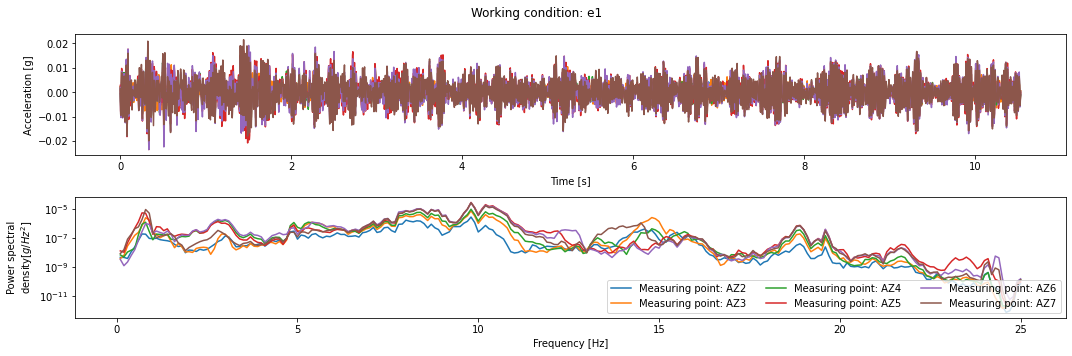

In [28]:
condition = 'Working condition: e1'
fs = 50 # Sample rate of data
fg,ax = plt.subplots(2,figsize=(15,5))
for channel in measuring_points:
    f,psd = welch(dat0[condition][channel]['Acceleration'],fs=fs,nperseg=fs*10)
    channel_name = channel.split()[-1]
    if "Z" in channel_name:
        ax[0].plot(dat0[condition][channel]['Time [s]'],dat0[condition][channel]['Acceleration'],label=channel)
        ax[1].semilogy(f[1:],psd[1:],label=channel)
ax[0].set_ylabel('Acceleration [g]')
ax[1].set_ylabel('Power spectral\ndensity[$g/Hz^2$]')
ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend(loc=4,ncol=3)
fg.suptitle(condition)
fg.tight_layout()

### Plotting and resampling the input excitation
The input excitation, also sampled at 50Hz, from the El Centro wave is also avaiable. 

The block of code below loads the input excitation and plots it against time.

10.53312426499412
53.72


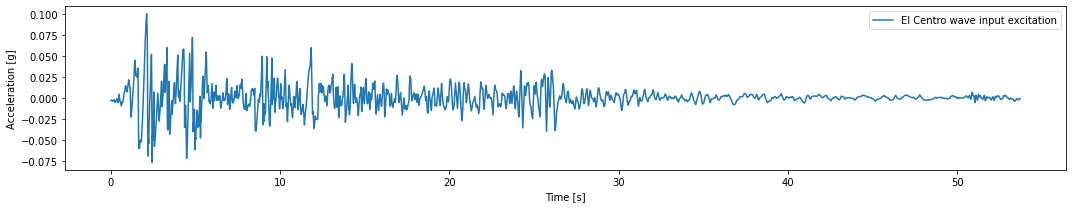

In [29]:
url = "https://raw.githubusercontent.com/zwynne/EDACAB/main/Chongqing_data/elx.TXT"

excitation_data = np.loadtxt(url) # it's a file like object and works just like a file
fs_excitation = 50 # Input excitation sample rate

t_excitation = np.arange(0,len(excitation_data)/fs_excitation,1/fs_excitation) # Time steps at which excitation was originally sampled
t_output = dat0['Working condition: e1']['Measuring point: A10']['Time [s]'] # Time steps for linearly interpolated excitation
# Resample excitation data through linear interpolation
#excitation_data = np.interp(t_output,t_excitation,excitation_data)

fg,ax = plt.subplots(figsize=(15,3))
ax.plot(t_excitation,excitation_data,label='El Centro wave input excitation')
ax.set_ylabel('Acceleration [g]')
ax.set_xlabel('Time [s]')
ax.legend(loc=1)
fg.tight_layout()
print(np.max(dat0['Working condition: e1']['Measuring point: A10']['Time [s]']))
print(np.max(t_excitation))